<a href="https://colab.research.google.com/github/T0B1K/BrailleGloveStatistics/blob/main/study1/experiment/study1_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definitions

In [1]:
braille_character = {
't': '⠞ (T)',
'h': '⠓ (H)',
'e': '⠑ (E)',
'o': '⠕ (O)',
'l': '⠇ (L)',
'd': '⠙ (D)',
'p': '⠏ (P)',
'u': '⠥ (U)',
'b': '⠃ (B)',
'the': '⠞⠓⠑ (THE)',
'old': '⠕⠇⠙ (OLD)',
'pub': '⠏⠥⠃ (PUB)'
}

numbers_encoding = {
    'f': '(1) [F]',
    'd': '(2) [D]',
    's': '(3) [S]',
    'j': '(4) [J]',
    'k': '(5) [K]',
    'l': '(6) [L]'
}

In [2]:
import seaborn as sns

pastel_colors = sns.color_palette("pastel", 3)

# Define the order for the conditions and map them to the pastel colors
condition_order = ["Stroke", "Tap", "Vibration"]
condition_palette = {
    "Stroke": pastel_colors[0],  # First color in the pastel palette
    "Tap": pastel_colors[1],     # Second color in the pastel palette
    "Vibration": pastel_colors[2]  # Third color in the pastel palette
}

In [3]:
import re
import pandas as pd

def splitText(text:str):
  pattern = re.compile(r"Test\s+(\S+)\s+Submitted Value\s+(.+?)\s+Test Time \(ms\)\s+(\d+)", re.DOTALL)

  # Find all matches and convert them to dictionaries
  results = []
  for match in pattern.finditer(text):
      test, submitted_value, test_time = match.groups()
      entry = {
          "Test": test,
          "Submitted Value": submitted_value.strip(),
          "Test Time (ms)": int(test_time)
      }
      results.append(entry)

  # Display the extracted data
  return results

def openTextDocument(name:str):
  contents = ""
  try:
      with open(name, "r") as file:
          contents = file.read()
  except FileNotFoundError:
      print("File not found.")
  return contents

def getPandasDataFrameFromText(name:str):
  text = openTextDocument(name)
  splittedText = splitText(text)
  return pd.DataFrame(splittedText)

In [4]:
t = ["d", "s", "j", "k"]
h = ["f", "d", "k"]
e = ["f", "k"]
o = ["f", "s", "k"]
l = ["f", "d", "s"]
d = ["f", "j", "k"]
p = ["f", "d", "s", "j"]
u = ["f", "s", "l"]
b = ["f", "d"]

t_set = set(t)
h_set = set(h)
e_set = set(e)
o_set = set(o)
l_set = set(l)
d_set = set(d)
p_set = set(p)
u_set = set(u)
b_set = set(b)

setMapper = {
    "t": t_set,
    "h": h_set,
    "e": e_set,
    "o": o_set,
    "l": l_set,
    "d": d_set,
    "p": p_set,
    "u": u_set,
    "b": b_set
}

In [5]:
def dice_coefficient(set1, set2):
    """Calculate the Dice coefficient between two sets."""
    intersection = len(set1.intersection(set2))
    return 2 * intersection / (len(set1) + len(set2))

def jaccard_coefficient(set1, set2):
    """Calculate the Jaccard coefficient between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union


In [6]:
participantDataOrder = [
    (1,"STV.txt", "STV"),
    (2,"SVT.txt", "SVT"),
    (3,"TVS.txt", "TVS"),
    (4,"TSV.txt", "TSV"),
    (5,"VTS.txt", "VTS"),
    (6,"VST.txt", "VST"),
    (7,"STV2.txt", "STV"),
    (8,"SVT2.txt", "SVT"),
    (9,"TVS2.txt", "TVS"),
    (10,"VTS2.txt", "VTS"),
    (11,"TSV2.txt", "TSV"),
    (12,"VST2.txt", "VST")
]


In [7]:
# dataframe = getPandasDataFrameFromText(participantDataOrder[0][1])
def deciderFunction(df, sequence):
  if df in ['t', 'h', 'e', 'the']:
    return sequence[0]
  if df in ['o', 'l', 'd', 'old']:
    return sequence[1]
  if df in ['p', 'u', 'b', 'pub']:
    return sequence[2]
  return None

# dataframe['Condition'] = dataframe["Test"].apply(lambda x: deciderFunction(x, "VST"))
dataframe_list = []
# STV.txt', 'STV' -> (the old) tests
for tuples in participantDataOrder:
  dataframe = getPandasDataFrameFromText(tuples[1])
  dataframe['ParticipantID'] = tuples[0]
  dataframe['Condition'] = dataframe["Test"].apply(lambda x: deciderFunction(x, tuples[2]))
  dataframe_list.append(dataframe)


dataframe = pd.concat(dataframe_list, ignore_index=True)
# participantDataOrder[0][1], participantDataOrder[0][2]
dataframe
# getPandasDataFrameFromText(participantDataOrder[0][1])

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


,Test,Submitted Value,Test Time (ms),ParticipantID,Condition
0,test,dfsdfjkl kfsfss,52810,1,None
1,test,jff kd sdf,16044,1,None
2,test,sd jkl jdkl,1016464,1,None
3,t,sdjk,2587337,1,S
4,t,sdjk,1583,1,S
...,...,...,...,...,...
472,b,fd,828,12,T
473,b,fd,960,12,T
474,pub,jfd kl ds,13011,12,T
475,pub,fjk kl ds,13968,12,T


In [8]:
dataframe_no_tests = dataframe[~dataframe['Test'].isin(['test', 'the', 'old', 'pub'])]
dataframe_tests = dataframe[dataframe['Test'].isin(['the', 'old', 'pub'])]

In [9]:

def dice(submitted_value, tested_character):
  return dice_coefficient(set(submitted_value), setMapper[tested_character])
def jaccard(submitted_value, tested_character):
  return jaccard_coefficient(set(submitted_value), setMapper[tested_character])

dataframe_no_tests.loc[:, "dice_coefficient"] = dataframe_no_tests.apply(lambda row: dice(row["Submitted Value"], row["Test"]), axis=1)
dataframe_no_tests.loc[:, "jaccard_coefficient"] = dataframe_no_tests.apply(lambda row: jaccard(row["Submitted Value"], row["Test"]), axis=1)

dataframe_no_tests

<ipython-input-9-2a4531df554d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_no_tests.loc[:, "dice_coefficient"] = dataframe_no_tests.apply(lambda row: dice(row["Submitted Value"], row["Test"]), axis=1)
<ipython-input-9-2a4531df554d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_no_tests.loc[:, "jaccard_coefficient"] = dataframe_no_tests.apply(lambda row: jaccard(row["Submitted Value"], row["Test"]), axis=1)


,Test,Submitted Value,Test Time (ms),ParticipantID,Condition,dice_coefficient,jaccard_coefficient
3,t,sdjk,2587337,1,S,1.000000,1.00
4,t,sdjk,1583,1,S,1.000000,1.00
5,t,sdjk,1346,1,S,1.000000,1.00
6,h,skl,3053,1,S,0.333333,0.20
7,h,dfjk,2683,1,S,0.857143,0.75
...,...,...,...,...,...,...,...
469,u,ld,1592,12,T,0.400000,0.25
470,b,fdf,1407,12,T,1.000000,1.00
471,b,fd,724,12,T,1.000000,1.00
472,b,fd,828,12,T,1.000000,1.00


In [10]:
dataframe_no_tests = dataframe_no_tests.loc[dataframe_no_tests.groupby(['Condition', 'Test', 'ParticipantID'])['jaccard_coefficient'].idxmax()]
dataframe_no_tests

,Test,Submitted Value,Test Time (ms),ParticipantID,Condition,dice_coefficient,jaccard_coefficient
113,b,flk,1481,3,S,0.400000,0.250000
191,b,sf,1024,5,S,0.500000,0.333333
349,b,jds,1310,9,S,0.400000,0.250000
395,b,df,773,10,S,1.000000,1.000000
138,d,sfj,1466,4,S,0.666667,0.500000
...,...,...,...,...,...,...,...
438,t,fdsjkl,6428,12,V,0.800000,0.666667
24,u,sdfl,2491,1,V,0.857143,0.750000
147,u,sjk,4283,4,V,0.333333,0.200000
265,u,sl,787,7,V,0.800000,0.666667


In [11]:
def filterDataFrame(value: str, df: dataframe, column:str):
  return df[df[column] == value]

dataframe_no_tests_s = filterDataFrame("S", dataframe_no_tests, "Condition")
dataframe_no_tests_t = filterDataFrame("T", dataframe_no_tests, "Condition")
dataframe_no_tests_v = filterDataFrame("V", dataframe_no_tests, "Condition")
dataframe_no_tests_v

,Test,Submitted Value,Test Time (ms),ParticipantID,Condition,dice_coefficient,jaccard_coefficient
27,b,df,613,1,V,1.000000,1.000000
150,b,sf,3185,4,V,0.500000,0.333333
268,b,df,361,7,V,1.000000,1.000000
431,b,df,361,11,V,1.000000,1.000000
51,d,fjk,3347,2,V,1.000000,1.000000
101,d,fjk,1121,3,V,1.000000,1.000000
295,d,fkl,1129,8,V,0.666667,0.500000
337,d,fjd,900,9,V,0.666667,0.500000
167,e,fk,1391,5,V,1.000000,1.000000
206,e,fkl,1113,6,V,0.800000,0.666667


## Test Compare

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def printBoxplots(data, score="jaccard_coefficient"):
    """
    Plot boxplots for each 'Test' condition as individual subplots arranged in a 3x3 grid.
    Also perform ANOVA or Kruskal-Wallis test based on normality and homogeneity of variances.
    Perform post-hoc analysis if there is a significant difference.

    Parameters:
        data (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'jaccard_coefficient' or 'dice_coefficient').
    """
    # Prepare the data
    pivot_df = prepare_data_for_plotting(data, score)

    # Define the order for the 'Test' column (specific order as requested)
    order = ["t", "h", "e", "o", "l", "d", "p", "u", "b"]

    # Set up the plotting environment (3x3 grid layout)
    num_plots = len(order)
    plt.figure(figsize=(15, 10))  # Adjust figsize based on 3x3 grid
    sns.set(style="whitegrid")

    # Loop over the specified order and plot each one as a separate subplot
    for i, test in enumerate(order):
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots

        # Filter data for the current test
        test_data = pivot_df[pivot_df['Test'] == test]

        # Plot the boxplot for the current test with a swarmplot on top
        plot_boxplot(test_data, score, test, i)

        # Print medians for the current question
        print_medians(test_data, score, test)

        # Perform Levene's test for homogeneity of variances
        p_value_levene = perform_levenes_test(test_data, score)

        # Perform Shapiro-Wilk Test for normality
        normality = check_normality(test_data[score])
        H, p_value_kruskal, k, N = perform_kruskal_wallis(test_data, score)
        eta_squared = calculate_eta_squared(H, k, N)
        print(f"\tEffect Size (Eta-Squared): {eta_squared:.4f}")
        if p_value_kruskal < 0.05:
            print_posthoc_analysis(test_data, score)

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig('/content/Test_single_char.pdf', format='pdf')

def plot_boxplot(test_data, score, test, i):
    """
    Plot the boxplot for a given test with a swarmplot on top.

    Parameters:
        test_data (pd.DataFrame): Data filtered for the specific test.
        score (str): The score column to plot.
        test (str): The test name for the title.
        i (int): The index of the subplot.
    """
    # Plot the boxplot
    sns.boxplot(
        x='Condition',
        y=score,
        data=test_data,
        showfliers=False,
        palette=condition_palette,
        order=condition_order,
        width=0.7,
        dodge=False,  # Keep all conditions in the same box plot
        medianprops={'color': '#6E6E6E', 'linewidth': 2}
    )

    # Add swarmplot on top of the boxplot
    sns.swarmplot(
        x='Condition',
        y=score,
        data=test_data,
        color='k',  # 'k' stands for black, or you can customize the color
        alpha=0.5,  # Adjust transparency
        size=5,  # Adjust size of the points
        dodge=False  # Keep all points on top of each box
    )

    # Customize the plot for the current test
    plt.title(f"{braille_character[test]}", fontsize=12)
    plt.xlabel('Stimulus')
    if i == 0:
        plt.ylabel(score.replace('_', ' ').title())  # Add y-axis label for the first plot
    else:
        plt.ylabel('')  # Remove y-axis label for other plots
    # Set the y-axis range from 0 to 1
    plt.ylim(0, 1)

def print_medians(question_data, question, test):
    """
    Print the median for each condition in the current question.

    Parameters:
        question_data (pd.DataFrame): The melted data frame for the question.
        question (str): The NASA TLX question label.
    """
    print(f"Medians for '{test}':")
    for condition in question_data['Condition'].unique():
        condition_data = question_data[question_data['Condition'] == condition]
        median = condition_data[question].median()
        print(f"  {condition}: {median}")


def perform_levenes_test(test_data, score):
    """
    Perform Levene's test for homogeneity of variances.

    Parameters:
        test_data (pd.DataFrame): Data for the current test.
        score (str): The score column to check.

    Returns:
        float: The p-value from Levene's test.
    """
    groups = [test_data[test_data['Condition'] == condition][score] for condition in test_data['Condition'].unique()]
    stat, p_value = stats.levene(*groups)
    print(f"Levene's Test: p-value = {p_value}, stat: {stat} -> Homogeneity of variances: {p_value > 0.05}")
    return p_value


# Check normality using Shapiro-Wilk
def check_normality(data):
    """
    Perform Shapiro-Wilk test for normality.

    Parameters:
        data (pd.Series): The data to check for normality.

    Returns:
        bool: True if data is normally distributed (p > 0.05), False otherwise.
    """
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test: p-value = {p_value} -> Normality: {p_value > 0.05}")
    return p_value > 0.05  # p-value > 0.05 indicates normality


def prepare_data_for_plotting(data, score):
    """
    Prepare the data for plotting by replacing the stimulus names and selecting relevant columns.

    Parameters:
        data (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'jaccard_coefficient' or 'dice_coefficient').

    Returns:
        pd.DataFrame: DataFrame with relevant columns and formatted stimuli names.
    """
    pivot_df = data[['Test', 'Condition', 'ParticipantID', score]]
    pivot_df.replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)
    return pivot_df


def perform_anova(test_data, score):
    """
    Perform an ANOVA test to check for significant differences between conditions.

    Parameters:
        test_data (pd.DataFrame): Data for the current test.
        score (str): The score column to perform ANOVA on.

    Returns:
        float: The p-value from the ANOVA test.
    """
    # Prepare the data for ANOVA
    conditions = test_data['Condition'].unique()
    condition_data = [test_data[test_data['Condition'] == condition][score] for condition in conditions]

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*condition_data)
    print(f"ANOVA: f_stat: {f_stat}, p-value: {p_value}")

    return p_value


def calculate_eta_squared(H, k, N):
    # Correct formula for eta-squared for Kruskal-Wallis
    eta_squared = H / (N - 1)
    return eta_squared


def perform_kruskal_wallis(test_data, score):
    """
    Perform a Kruskal-Wallis test for non-parametric data.

    Parameters:
        test_data (pd.DataFrame): Data for the current test.
        score (str): The score column to perform Kruskal-Wallis test on.

    Returns:
        float: The p-value from the Kruskal-Wallis test.
    """
    # Prepare the data for Kruskal-Wallis
    conditions = test_data['Condition'].unique()
    condition_data = [test_data[test_data['Condition'] == condition][score] for condition in conditions]
    groups = [data for data in condition_data]

    # Perform Kruskal-Wallis test
    h_stat, p_value = stats.kruskal(*condition_data)
    print(f"Kruskal-Wallis: H-stat: {h_stat:.4f}, p-value: {p_value:.4f}")
    return h_stat, p_value, len(groups), sum(len(group) for group in groups)


def print_anova_result(test, p_value):
    """
    Print the result of the ANOVA test.

    Parameters:
        test (str): The name of the test.
        p_value (float): The p-value from the ANOVA test.
    """
    print(f"ANOVA result for '{test}': p-value = {p_value}")
    if p_value < 0.05:
        print(f"  * Significant difference found for '{test}' between conditions.")
    else:
        print(f"  * No significant difference found for '{test}' between conditions.")

def print_kruskal_wallis_result(test, p_value):
    """
    Print the result of the Kruskal-Wallis test.

    Parameters:
        test (str): The name of the test.
        p_value (float): The p-value from the Kruskal-Wallis test.
    """
    print(f"Kruskal-Wallis result for '{test}': p-value = {p_value}")
    if p_value < 0.05:
        print(f"  * Significant difference found for '{test}' between conditions.")
    else:
        print(f"  * No significant difference found for '{test}' between conditions.")

def print_posthoc_analysis(test_data, score):
    """
    Perform post-hoc analysis using Tukey's HSD when a significant difference is found.

    Parameters:
        test_data (pd.DataFrame): Data for the current test.
        score (str): The score column to perform post-hoc analysis on.
    """
    tukey = pairwise_tukeyhsd(test_data[score], test_data['Condition'], alpha=0.05)
    print("\nMultiple Comparison of Means - Tukey HSD, FWER=0.05")
    print(tukey.summary())

# Example usage
# printBoxplots(dataframe_no_tests, score="jaccard_coefficient")


<ipython-input-12-7d8f5f948fb3>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df.replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)
<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 't':
  Stroke: 0.575
  Tap: 0.4642857142857143
  Vibration: 0.6333333333333333
Levene's Test: p-value = 0.04162262443493394, stat: 4.620700382188248 -> Homogeneity of variances: False
Shapiro-Wilk Test: p-value = 0.8372235610109349 -> Normality: True
Kruskal-Wallis: H-stat: 1.9406, p-value: 0.3790
	Effect Size (Eta-Squared): 0.1764


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'h':
  Stroke: 0.7083333333333333
  Tap: 0.5
  Vibration: 0.6666666666666666
Levene's Test: p-value = 0.5805056695008444, stat: 0.5780849974398363 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.24966657259116687 -> Normality: True
Kruskal-Wallis: H-stat: 2.2817, p-value: 0.3195
	Effect Size (Eta-Squared): 0.2074


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'e':
  Stroke: 0.6666666666666666
  Tap: 0.3333333333333333
  Vibration: 0.5
Levene's Test: p-value = 0.6286381324542634, stat: 0.4889867841409693 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.0013667796905459423 -> Normality: False
Kruskal-Wallis: H-stat: 1.1068, p-value: 0.5750
	Effect Size (Eta-Squared): 0.1006


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'o':
  Stroke: 0.5833333333333333
  Tap: 0.5
  Vibration: 0.7
Levene's Test: p-value = 0.09410550063139785, stat: 3.1084828711256134 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.34860573198627803 -> Normality: True
Kruskal-Wallis: H-stat: 0.2790, p-value: 0.8698
	Effect Size (Eta-Squared): 0.0254


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'l':
  Stroke: 1.0
  Tap: 1.0
  Vibration: 1.0
Levene's Test: p-value = 0.4053444297059028, stat: 1.0000000000000002 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 1.2072845575096494e-06 -> Normality: False
Kruskal-Wallis: H-stat: 2.0000, p-value: 0.3679
	Effect Size (Eta-Squared): 0.1818


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'd':
  Stroke: 0.5
  Tap: 0.6666666666666666
  Vibration: 0.75
Levene's Test: p-value = 0.3351576977709809, stat: 1.237367802585194 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.06083418437765902 -> Normality: True
Kruskal-Wallis: H-stat: 2.9298, p-value: 0.2311
	Effect Size (Eta-Squared): 0.2663


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'p':
  Stroke: 0.55
  Tap: 0.575
  Vibration: 0.4
Levene's Test: p-value = 0.9803713793285609, stat: 0.01986754966887417 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.004591322354821297 -> Normality: False
Kruskal-Wallis: H-stat: 0.7068, p-value: 0.7023
	Effect Size (Eta-Squared): 0.0643


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'u':
  Stroke: 0.5
  Tap: 0.4583333333333333
  Vibration: 0.6666666666666666
Levene's Test: p-value = 0.5947294285766618, stat: 0.5508416351769148 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.15955868269139417 -> Normality: True
Kruskal-Wallis: H-stat: 0.0299, p-value: 0.9852
	Effect Size (Eta-Squared): 0.0027


<ipython-input-12-7d8f5f948fb3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for 'b':
  Stroke: 0.29166666666666663
  Tap: 1.0
  Vibration: 1.0
Levene's Test: p-value = 0.9794292682006803, stat: 0.020833333333333297 -> Homogeneity of variances: True
Shapiro-Wilk Test: p-value = 0.0004728629838425175 -> Normality: False
Kruskal-Wallis: H-stat: 3.6667, p-value: 0.1599
	Effect Size (Eta-Squared): 0.3333


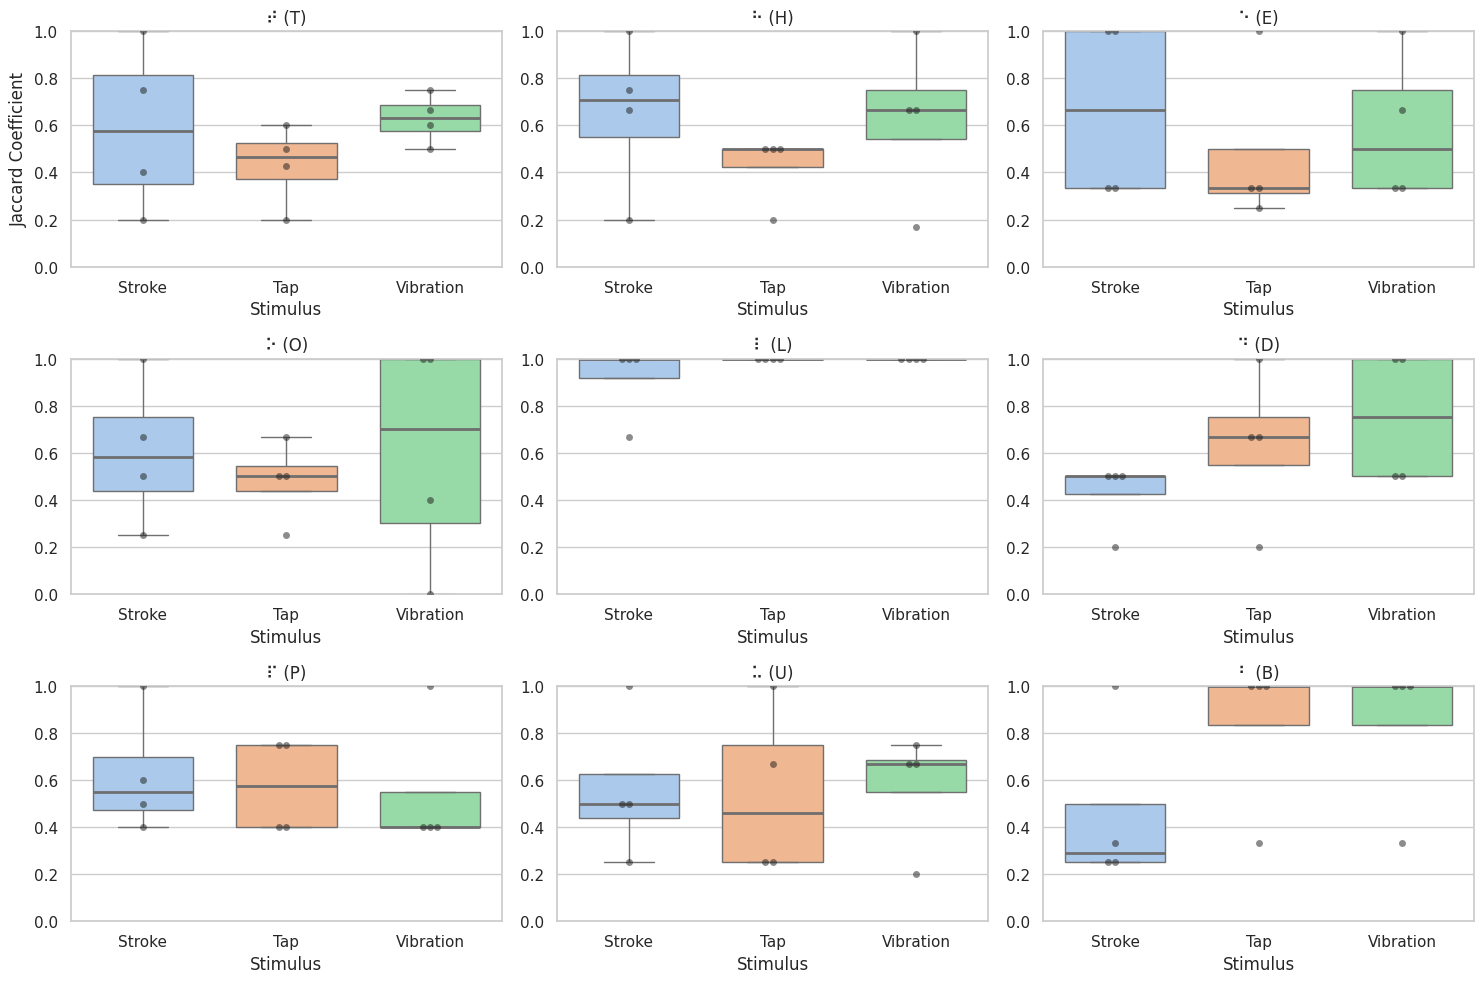

In [13]:
printBoxplots(dataframe_no_tests.copy())

## General Data

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

# Test if the data is normally distributed
def check_normality(data, dataset_name):
    """
    Perform the Shapiro-Wilk test for normality on a dataset.

    Parameters:
        data (pd.Series): The data to check for normality.
        dataset_name (str): The name of the dataset (e.g., 'Stroke', 'Tap', 'Vibration').

    Returns:
        bool: True if data is normally distributed, False otherwise.
    """
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test for {dataset_name} - Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"The {dataset_name} dataset is not normally distributed.")
        return False  # Not normally distributed
    else:
        print(f"The {dataset_name} dataset is normally distributed.")
        return True  # Normally distributed

# Test homogeneity of variances with Levene's test
def check_homogeneity_of_variances(data):
    """
    Perform Levene's test for homogeneity of variances.

    Parameters:
        data (list of pd.Series): The datasets to test for equality of variances.

    Returns:
        bool: True if variances are equal (Levene's p-value > 0.05), False otherwise.
    """
    stat_levene, p_value_levene = stats.levene(*data)
    print(f"Levene's Test statistic: {stat_levene}, p-value: {p_value_levene}")

    if p_value_levene < 0.05:
        print("Levene's test indicates a significant difference in variances (the variances are not equal).\n")
        return False  # Variances are not equal
    else:
        print("Levene's test indicates no significant difference in variances (the variances are equal).\n")
        return True  # Variances are equal

# Perform Kruskal-Wallis or ANOVA based on assumptions
def perform_test(data, normality_results, homogeneity_result):
    """
    Decide whether to perform ANOVA or Kruskal-Wallis based on normality and homogeneity of variances.

    Parameters:
        data (list of pd.Series): The datasets for the test.
        normality_results (list of bool): A list of normality check results for each dataset.
        homogeneity_result (bool): Result of Levene's test for homogeneity of variances.

    Returns:
        None: Prints the test results.
    """
    if all(normality_results) and homogeneity_result:  # All datasets are normal, and variances are equal
        print("Normality and Homogeneity of Variance assumptions met. Performing ANOVA...")
        perform_anova(data)
    else:
        print("Normality or Homogeneity of Variance assumptions not met. Performing Kruskal-Wallis Test...")
        perform_kruskal_wallis(data)

# Perform ANOVA
def perform_anova(data):
    """
    Perform an ANOVA test.

    Parameters:
        data (list of pd.Series): The datasets for the test.

    Returns:
        None: Prints the ANOVA results.
    """
    f_statistic, p_value = stats.f_oneway(*data)
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("There is a significant difference between the datasets.")
    else:
        print("There is no significant difference between the datasets.")
    return p_value

# Perform Kruskal-Wallis Test
def perform_kruskal_wallis(data):
    """
    Perform a Kruskal-Wallis test.

    Parameters:
        data (list of pd.Series): The datasets for the test.

    Returns:
        None: Prints the Kruskal-Wallis results.
    """
    h_stat, p_value = stats.kruskal(*data)
    print(f"H-statistic: {h_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference between the datasets.")
    else:
        print("There is no significant difference between the datasets.")
    return h_stat, p_value, len(data), sum(len(group) for group in data)  # Return H, p_value, k, N

# Example usage:
data = [dataframe_no_tests_s['jaccard_coefficient'], dataframe_no_tests_t['jaccard_coefficient'], dataframe_no_tests_v['jaccard_coefficient']]

# Check normality for each dataset
normality_results = [
    check_normality(dataframe_no_tests_s['jaccard_coefficient'], "Stroke"),
    check_normality(dataframe_no_tests_t['jaccard_coefficient'], "Tap"),
    check_normality(dataframe_no_tests_v['jaccard_coefficient'], "Vibration")
]

# Check homogeneity of variances (Levene's Test)
homogeneity_result = check_homogeneity_of_variances(data)

# Perform the appropriate test based on normality and homogeneity results
perform_test(data, normality_results, homogeneity_result)


Shapiro-Wilk Test for Stroke - Statistic: 0.8624559869752475, p-value: 0.0003733032457236686
The Stroke dataset is not normally distributed.
Shapiro-Wilk Test for Tap - Statistic: 0.8745061554139886, p-value: 0.0007360060522591481
The Tap dataset is not normally distributed.
Shapiro-Wilk Test for Vibration - Statistic: 0.8717700656922798, p-value: 0.0006293237211664064
The Vibration dataset is not normally distributed.
Levene's Test statistic: 0.015519232835500047, p-value: 0.9846028279206167
Levene's test indicates no significant difference in variances (the variances are equal).

Normality or Homogeneity of Variance assumptions not met. Performing Kruskal-Wallis Test...
H-statistic: 1.7843
P-value: 0.4098
There is no significant difference between the datasets.


In [15]:
dataframe_tests

,Test,Submitted Value,Test Time (ms),ParticipantID,Condition
30,pub,sdfk sdfl df,6805,1,V
31,pub,sdfk sdfl df,8894,1,V
32,pub,sdfk sdfl df,4556,1,V
42,the,fdj dk dj,7904,2,S
43,the,dfj dk dj,7088,2,S
...,...,...,...,...,...
461,old,fkl dkl jfd,13916,12,S
462,old,fjk fjk fjk,12958,12,S
474,pub,jfd kl ds,13011,12,T
475,pub,fjk kl ds,13968,12,T


# Test results

In [16]:
def jaccard_word_score(word:str, test_word:str):
  if len(test_word) != len(word.split()):
    return 0
  return sum(jaccard(w, t) for w, t in zip(word.split(), test_word))/len(test_word)

dataframe_tests_V = dataframe_tests[
    (dataframe_tests['Test'].isin(['the', 'old', 'pub'])) &
    (dataframe_tests['Condition'] == 'V')]

dataframe_tests_T = dataframe_tests[
    (dataframe_tests['Test'].isin(['the', 'old', 'pub'])) &
    (dataframe_tests['Condition'] == 'T')]

dataframe_tests_S = dataframe_tests[
    (dataframe_tests['Test'].isin(['the', 'old', 'pub'])) &
    (dataframe_tests['Condition'] == 'S')]


dataframe_tests_V_copy = dataframe_tests_V.copy()
dataframe_tests_S_copy = dataframe_tests_S.copy()
dataframe_tests_T_copy = dataframe_tests_T.copy()

# Apply the operation on the copied DataFrames
dataframe_tests_V_copy["jaccard_word_score"] = dataframe_tests_V_copy.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)
dataframe_tests_S_copy["jaccard_word_score"] = dataframe_tests_S_copy.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)
dataframe_tests_T_copy["jaccard_word_score"] = dataframe_tests_T_copy.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)

dataframe_tests_V_maxJaccard = dataframe_tests_V_copy.loc[dataframe_tests_V_copy.groupby(['ParticipantID', 'Test'])['jaccard_word_score'].idxmax()]
dataframe_tests_S_maxJaccard = dataframe_tests_S_copy.loc[dataframe_tests_S_copy.groupby(['ParticipantID', 'Test'])['jaccard_word_score'].idxmax()]
dataframe_tests_T_maxJaccard = dataframe_tests_T_copy.loc[dataframe_tests_T_copy.groupby(['ParticipantID', 'Test'])['jaccard_word_score'].idxmax()]

In [17]:
dataframe_tests_S_maxJaccard

,Test,Submitted Value,Test Time (ms),ParticipantID,Condition,jaccard_word_score
42,the,fdj dk dj,7904,2,S,0.355556
117,pub,dfjk fkl fkl,6521,3,S,0.450000
141,old,sfl ls sfj,11167,4,S,0.416667
195,pub,sdfj sfj sf,9183,5,S,0.611111
223,old,flj df kfl,12695,6,S,0.455556
249,the,dk ls lk,4435,7,S,0.277778
286,the,sfj sfk fk,15203,8,S,0.633333
353,pub,ksd ls fk,13147,9,S,0.466667
400,pub,fk ld sd,8769,10,S,0.261111
422,old,kls sdf sl,6771,11,S,0.500000


In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# Perform Levene's Test for homogeneity of variances
def perform_levene_test(data):
    stat_levene, p_value_levene = stats.levene(*data)
    print(f"Levene's Test statistic: {stat_levene}, p-value: {p_value_levene}")
    if p_value_levene < 0.05:
        print("Levene's test indicates a significant difference in variances (the variances are not equal).\n")
    else:
        print("Levene's test indicates no significant difference in variances (the variances are equal).\n")
    return p_value_levene


# Check for significance based on p-value
def check_significance(p_value, alpha=0.05):
    if p_value < alpha:
        print("There is a significant difference between the datasets.")
    else:
        print("There is no significant difference between the datasets.")


# Helper Function for Post-Hoc Test (Tukey’s HSD) if necessary
def post_hoc_test(data):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    all_data = np.concatenate(data)
    labels = np.concatenate([[f"Condition {i+1}" for _ in range(len(d))] for i, d in enumerate(data)])
    tukey = pairwise_tukeyhsd(all_data, labels, alpha=0.05)
    print(tukey)

# Main analysis function
def analyze_datasets(dataframes):
    # Prepare data for analysis
    data = [
        dataframes['Vibration']['jaccard_word_score'],
        dataframes['Stroke']['jaccard_word_score'],
        dataframes['Tap']['jaccard_word_score']
    ]

    # Perform Levene's Test for Homogeneity of Variances
    p_value_levene = perform_levene_test(data)

    # Check normality for each dataset
    normality_results = {
        'Vibration': check_normality(dataframes['Vibration']['jaccard_word_score'], "Vibration"),
        'Stroke': check_normality(dataframes['Stroke']['jaccard_word_score'], "Stroke"),
        'Tap': check_normality(dataframes['Tap']['jaccard_word_score'], "Tap")
    }

    # If the Levene's Test shows equal variances and normality assumptions are met, use ANOVA
    if p_value_levene >= 0.05 and all(normality_results.values()):
        print("\nAssumptions met. Performing ANOVA...")
        p_value_anova = perform_anova(data)
        check_significance(p_value_anova)
    else:
        print("\nAssumptions not met. Skipping ANOVA.")

# Example usage with the input DataFrame
dataframes = {
    'Vibration': dataframe_tests_V_maxJaccard,
    'Stroke': dataframe_tests_S_maxJaccard,
    'Tap': dataframe_tests_T_maxJaccard
}

analyze_datasets(dataframes)


Levene's Test statistic: 0.9669919255980404, p-value: 0.3913993473220747
Levene's test indicates no significant difference in variances (the variances are equal).

Shapiro-Wilk Test for Vibration - Statistic: 0.9602377573944318, p-value: 0.7872191401869509
The Vibration dataset is normally distributed.
Shapiro-Wilk Test for Stroke - Statistic: 0.9540094189384453, p-value: 0.6954405602828672
The Stroke dataset is normally distributed.
Shapiro-Wilk Test for Tap - Statistic: 0.9544205126370804, p-value: 0.7007277885364718
The Tap dataset is normally distributed.

Assumptions met. Performing ANOVA...
F-statistic: 1.426864570279769
P-value: 0.25539081242509487
There is no significant difference between the datasets.
There is no significant difference between the datasets.


<ipython-input-19-75128cd47792>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df.replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)


Levene's Test statistic: 1.4661066785671097, p-value: 0.2867659297438969
Levene's test indicates no significant difference in variances (the variances are equal).

Shapiro-Wilk Test for Vibration - Statistic: 0.978652802563151, p-value: 0.8940730776149787
The Vibration dataset is normally distributed.
Shapiro-Wilk Test for Stroke - Statistic: 0.9045936395759717, p-value: 0.4002767038107058
The Stroke dataset is normally distributed.
Shapiro-Wilk Test for Tap - Statistic: 0.8748247749490882, p-value: 0.3170035175491144
The Tap dataset is normally distributed.
H-statistic: 0.0361
P-value: 0.9821
There is no significant difference between the datasets.
	Effect Size (Eta-Squared): 0.0036



Levene's Test statistic: 0.39912320522963946, p-value: 0.6835581472608754
Levene's test indicates no significant difference in variances (the variances are equal).

Shapiro-Wilk Test for Vibration - Statistic: 0.7464955756799789, p-value: 0.03579691796603359
The Vibration dataset is not normally distrib

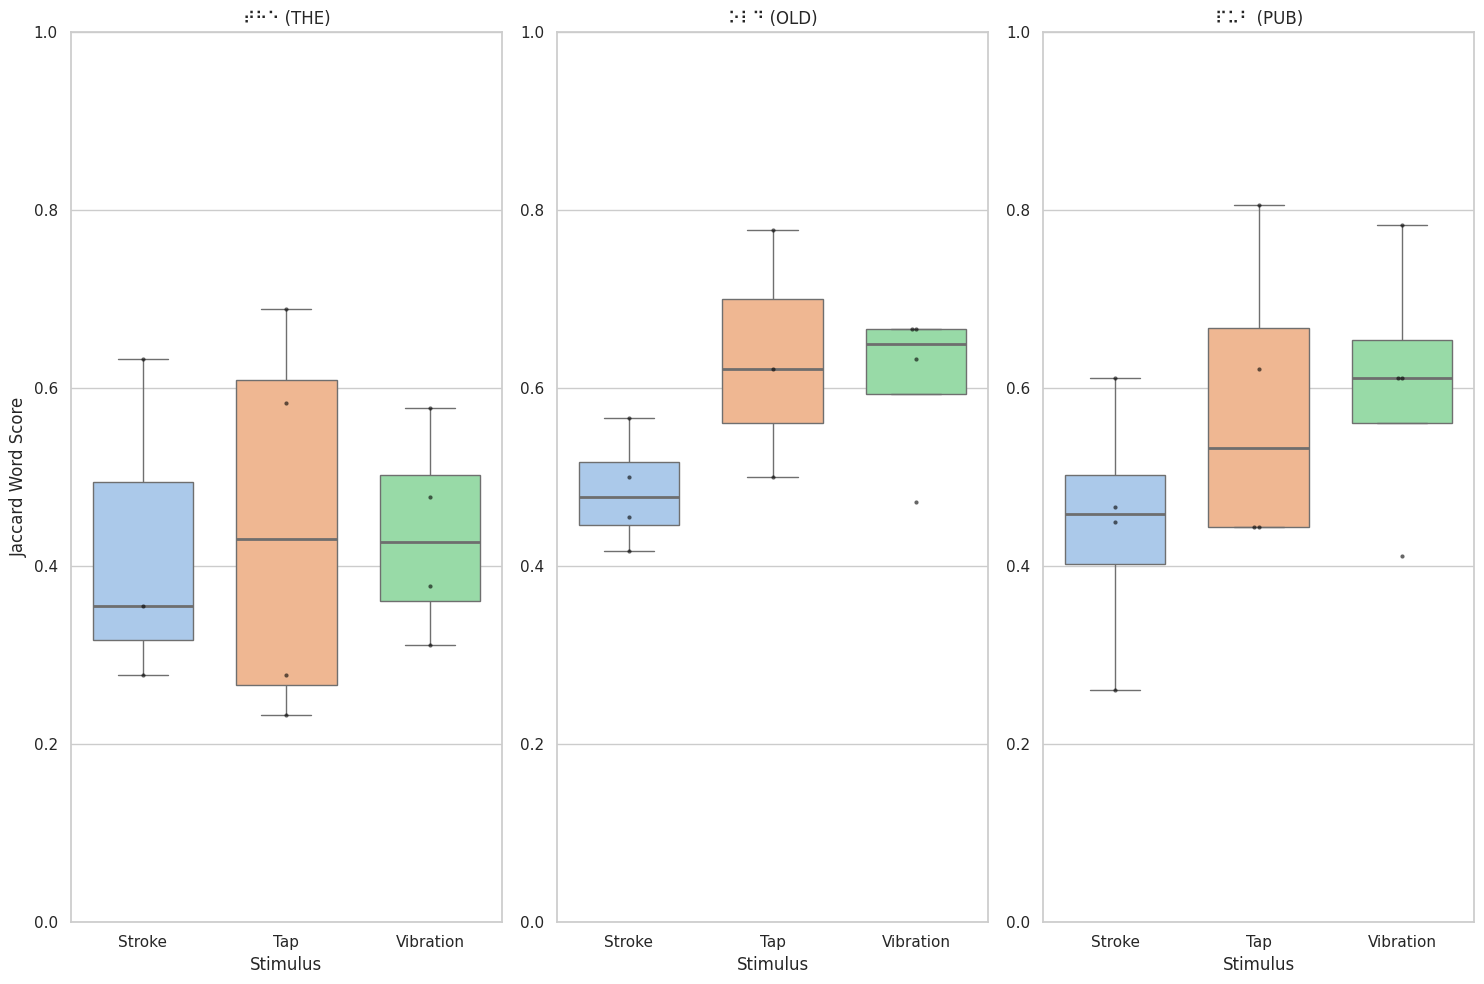

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Function to Plot Boxplots with Swarmplots and Perform Statistical Tests
def print_boxplots_and_tests(data, score="jaccard_coefficient"):
    """
    Plot boxplots for each 'Test' condition and perform Levene's, Shapiro-Wilk, ANOVA/Kruskal-Wallis tests.

    Parameters:
        data (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'jaccard_coefficient' or 'dice_coefficient').
    """
    # Extract relevant columns for plotting
    pivot_df = data[['Test', 'Condition', 'ParticipantID', score]]
    pivot_df.replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)

    # Define the order for the 'Test' column (specific order as requested)
    order = ["the", "old", "pub"]

    # Set up the plotting environment (3x3 grid layout)
    num_plots = len(order)
    plt.figure(figsize=(15, 10))  # Adjust figsize based on 3x3 grid

    sns.set(style="whitegrid")

    # Loop over the specified order and plot each one as a separate subplot
    for i, test in enumerate(order):
        plt.subplot(1, 3, i + 1)  # Create a 3x3 grid of subplots

        # Filter data for the current test
        test_data = pivot_df[pivot_df['Test'] == test]

        # Call the function to plot boxplot with swarmplot
        plot_boxplot_with_swarmplot(test_data, score, test, i)

        # Perform Levene’s Test for homogeneity of variances
        conditions_data = [test_data[test_data['Condition'] == condition][score].values for condition in test_data['Condition'].unique()]
        p_value_levene = perform_levene_test(conditions_data)

        # Check normality for each condition
        normality_results = {condition: check_normality(test_data[test_data['Condition'] == condition][score].values, condition) for condition in test_data['Condition'].unique()}

        # # Decide between ANOVA or Kruskal-Wallis Test
        # if p_value_levene >= 0.05 and all(normality_results.values()):
        #     print(f"\nPerforming ANOVA for {test.upper()}...")
        #     p_value_anova = perform_anova(conditions_data)
        #     if p_value_anova < 0.05:
        #         post_hoc_test(conditions_data)  # Perform post-hoc test if necessary
        # else:
        #     print(f"\nPerforming Kruskal-Wallis Test for {test.upper()}...")

        H, p_value_kruskal, k, N = perform_kruskal_wallis(conditions_data)
        eta_squared = calculate_eta_squared(H, k, N)
        print(f"\tEffect Size (Eta-Squared): {eta_squared:.4f}")

        if p_value_kruskal < 0.05:
            post_hoc_test(conditions_data)  # Perform post-hoc test if necessary

        print("\n\n")

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig('/content/JaccardTest.pdf', format='pdf')


def plot_boxplot_with_swarmplot(test_data, score, test, i):
    """
    Helper function to plot the boxplot with a swarmplot on top for a given test.

    Parameters:
        test_data (pd.DataFrame): Data filtered for the specific test.
        score (str): The score column to plot.
        test (str): The test name for the title.
        i (int): The index of the subplot.
    """
    # Create the boxplot
    ax = sns.boxplot(
        x='Condition',
        y=score,
        data=test_data,
        showfliers=False,
        hue='Condition',  # Explicitly assign 'Condition' to hue
        palette=condition_palette,
        order=condition_order,
        width=0.7,
        dodge=False,  # Keep all conditions in the same box plot
        medianprops={'color': '#6E6E6E', 'linewidth': 2}
    )

    # Overlay the swarmplot on top of the boxplot
    sns.swarmplot(
        x='Condition',
        y=score,
        data=test_data,
        color='black',  # Set a color for the data points in the swarmplot
        alpha=0.6,  # Adjust transparency of data points
        size=3,  # Adjust the size of the points
        dodge=False  # Keep all conditions together
    )

    # Set the title (using the test variable for the title from braille_character)
    plt.title(f"{braille_character[test]}", fontsize=12)

    # Customize the x and y axis labels
    plt.xlabel('Stimulus')
    score = score.lower()
    if i == 0:
        plt.ylabel(score.replace('_', ' ').title())  # Add y-axis label for the first plot
    else:
        plt.ylabel('')  # Remove y-axis label for other plots

    # Set the y-axis range from 0 to 1
    plt.ylim(0, 1)

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig('/content/JaccardTest.pdf', format='pdf')

# Example usage
data = pd.concat([dataframe_tests_V_maxJaccard, dataframe_tests_S_maxJaccard, dataframe_tests_T_maxJaccard], ignore_index=True)

print_boxplots_and_tests(data, "jaccard_word_score")

# Specific character investigation

In [21]:
compareCharacters = []

def get_TP(submitted_value, tested_character):
  return len(set(submitted_value) & setMapper[tested_character])

def get_FP(submitted_value, tested_character):
  return len(set(submitted_value) - setMapper[tested_character])

def get_FN(submitted_value, tested_character):
  return len(setMapper[tested_character] - set(submitted_value))

def precision(submitted_value, tested_character):
  return get_TP(submitted_value, tested_character) / (get_TP(submitted_value, tested_character) + get_FP(submitted_value, tested_character))

def recall(submitted_value, tested_character):
  return get_TP(submitted_value, tested_character) / (get_TP(submitted_value, tested_character) + get_FN(submitted_value, tested_character))

def f1_score(submitted_value, tested_character):
  prec = precision(submitted_value, tested_character)
  rec = recall(submitted_value, tested_character)

  divisor = prec + rec

  if divisor == 0:
    return 0
  else:
    return 2 * (prec * rec) / divisor


def testFunction(value, test, condition):

  tmp = [(f1_score(submitted_value, tested_character), precision(submitted_value, tested_character), recall(submitted_value, tested_character), get_TP(submitted_value, tested_character), get_FP(submitted_value, tested_character),
         set(submitted_value), setMapper[tested_character],
         (setMapper[tested_character]-set(submitted_value)), (set(submitted_value)-setMapper[tested_character]), tested_character, condition, jaccard(submitted_value, tested_character))
  for submitted_value, tested_character in zip(value.split(), test)]

  compareCharacters.extend(tmp)

dataframe_tests_V_maxJaccard.apply(lambda row: testFunction(row["Submitted Value"], row["Test"], row["Condition"]), axis=1)
dataframe_tests_S_maxJaccard.apply(lambda row: testFunction(row["Submitted Value"], row["Test"], row["Condition"]), axis=1)
dataframe_tests_T_maxJaccard.apply(lambda row: testFunction(row["Submitted Value"], row["Test"], row["Condition"]), axis=1)

columns = ['F1', 'precision', 'recall', 'TP', 'FP', 'Submitted Value', 'Ground Truth', 'Missed Character', 'Surplus Character', 'Tested Character', 'Condition', 'Jaccard Score']
df = pd.DataFrame(compareCharacters, columns=columns)
df[['Condition', 'Tested Character', 'Missed Character', 'Ground Truth', 'Surplus Character',"Submitted Value"]]

,Condition,Tested Character,Missed Character,Ground Truth,Surplus Character,Submitted Value
0,V,p,{j},"{s, j, d, f}",{k},"{s, k, d, f}"
1,V,u,{},"{s, l, f}",{d},"{s, l, d, f}"
2,V,b,{},"{d, f}",{},"{d, f}"
3,V,o,{s},"{s, k, f}",{j},"{k, j, f}"
4,V,l,{},"{s, d, f}",{},"{s, d, f}"
...,...,...,...,...,...,...
97,T,h,"{k, d, f}","{k, d, f}","{s, l}","{s, l}"
98,T,e,{f},"{k, f}",{l},"{k, l}"
99,T,p,{s},"{s, j, d, f}",{},"{j, d, f}"
100,T,u,"{s, f}","{s, l, f}",{k},"{k, l}"


<ipython-input-22-b0f656d6681d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condition'].replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)


Character 't': Kruskal-Wallis H = 1.0203, p-value = 0.6004, Effect Size (Eta-Squared) = 0.1131
Character 'h': Kruskal-Wallis H = 0.0136, p-value = 0.9932, Effect Size (Eta-Squared) = 0.0017
Character 'e': Kruskal-Wallis H = 0.0979, p-value = 0.9522, Effect Size (Eta-Squared) = 0.0121
Character 'o': Kruskal-Wallis H = 0.5309, p-value = 0.7669, Effect Size (Eta-Squared) = 0.0622
Character 'l': Kruskal-Wallis H = 3.3764, p-value = 0.1849, Effect Size (Eta-Squared) = 0.2968
Character 'd': Kruskal-Wallis H = 0.5290, p-value = 0.7676, Effect Size (Eta-Squared) = 0.0620
Character 'p': Kruskal-Wallis H = 1.6124, p-value = 0.4465, Effect Size (Eta-Squared) = 0.1519
Character 'u': Kruskal-Wallis H = 2.5488, p-value = 0.2796, Effect Size (Eta-Squared) = 0.2207
Character 'b': Kruskal-Wallis H = 5.7683, p-value = 0.0559, Effect Size (Eta-Squared) = 0.3906


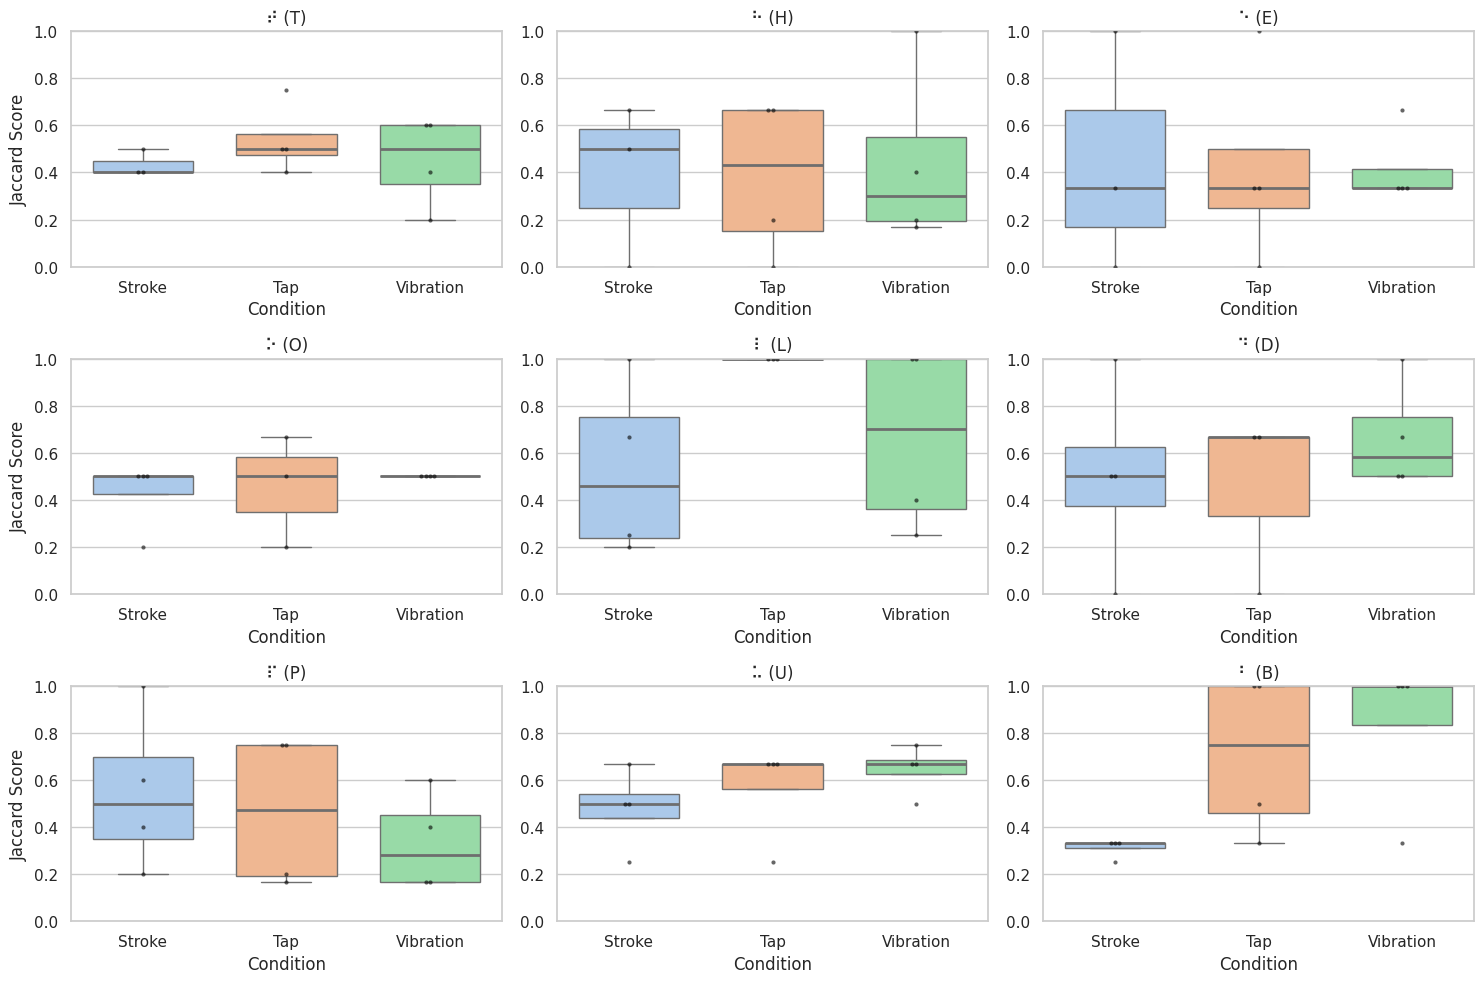

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

def plot_boxplots_with_swarm(df, score="F1"):
    """
    Plot boxplots for each 'Tested Character' condition as individual subplots arranged in a 3x3 grid.
    Each subplot will show the distribution of the score (e.g., 'F1' or 'Jaccard Score') for the 'Tested Character'
    under different conditions, with a swarm plot overlayed on top of the boxplot.

    Parameters:
        df (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'F1', 'Jaccard Score').
    """
    # Define the order of characters for sorting
    character_groups = [['t', 'h', 'e'], ['o', 'l', 'd'], ['p', 'u', 'b']]

    df['Condition'].replace({"T": "Tap", "S": "Stroke", "V": "Vibration"}, inplace=True)

    plt.figure(figsize=(15, 10))  # Adjust figsize for a 3x3 grid
    sns.set(style="whitegrid")

    # Loop through each group of characters and plot each one as a separate subplot
    for idx, char_group in enumerate(character_groups):
        for i, tested_char in enumerate(char_group):
            plt.subplot(3, 3, idx * 3 + i + 1)  # Create a 3x3 grid of subplots

            # Filter data for the current 'Tested Character'
            char_data = df[df['Tested Character'] == tested_char].copy()

            pastel_colors = sns.color_palette("pastel", 3)

            # Define the order for the conditions and map them to the pastel colors
            condition_order = ["Stroke", "Tap", "Vibration"]
            condition_palette = {
                "Stroke": pastel_colors[0],  # First color in the pastel palette
                "Tap": pastel_colors[1],     # Second color in the pastel palette
                "Vibration": pastel_colors[2]  # Third color in the pastel palette
            }

            # Plot the boxplot for the current 'Tested Character'
            ax = sns.boxplot(
                x='Condition',
                y=score,
                data=char_data,
                showfliers=False,  # Hide outliers
                hue='Condition',  # Differentiate by Condition
                order=condition_order,  # Order the conditions as requested
                width=0.7,
                dodge=False,  # Keep all conditions together
                palette=condition_palette,  # Pass the actual palette dictionary
                medianprops={'color': '#6E6E6E', 'linewidth': 2}
            )

            # Overlay the swarmplot on top of the boxplot
            sns.swarmplot(
                x='Condition',
                y=score,
                data=char_data,
                color='black',  # Set color for the data points in the swarmplot
                alpha=0.6,  # Adjust transparency of data points
                size=3,  # Adjust the size of the points
                dodge=False  # Keep all conditions together
            )

            # Customize the plot for the current 'Tested Character'
            plt.title(f"{braille_character[tested_char]}", fontsize=12)
            plt.xlabel('Condition')
            if i == 0:
                plt.ylabel(f'{score}')  # Add y-axis label for the first plot
            else:
                plt.ylabel('')  # Remove y-axis label for other plots

            # Set the y-axis range from 0 to 1
            plt.ylim(0, 1)

            # Perform Kruskal-Wallis test and calculate eta-squared for each character
            H, p_value_kruskal = kruskal(
                char_data[char_data['Condition'] == 'Stroke'][score],
                char_data[char_data['Condition'] == 'Tap'][score],
                char_data[char_data['Condition'] == 'Vibration'][score]
            )

            # Calculate eta-squared (effect size)
            k = 3  # Number of conditions
            N = len(char_data)  # Total number of observations
            eta_squared = H / (H + (N - k))  # Eta-squared formula

            print(f"Character '{tested_char}': Kruskal-Wallis H = {H:.4f}, p-value = {p_value_kruskal:.4f}, Effect Size (Eta-Squared) = {eta_squared:.4f}")

            # If p-value is significant, you can perform a post-hoc test (e.g., Dunn's test)
            if p_value_kruskal < 0.05:
                print(f"Post-hoc test required for {tested_char}.")
                # post_hoc_test(char_data)  # Uncomment to perform post-hoc test if necessary

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig('/content/boxplot_with_swarm_single_chars_test.pdf', format='pdf')

# Example usage
# Assuming df contains the relevant data
plot_boxplots_with_swarm(df, score="Jaccard Score")


<ipython-input-23-75960bc622ba>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
<ipython-input-23-75960bc622ba>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
<ipython-input-23-75960bc622ba>:34: SettingWithCopyWarning: 
A value is trying to be set on a 

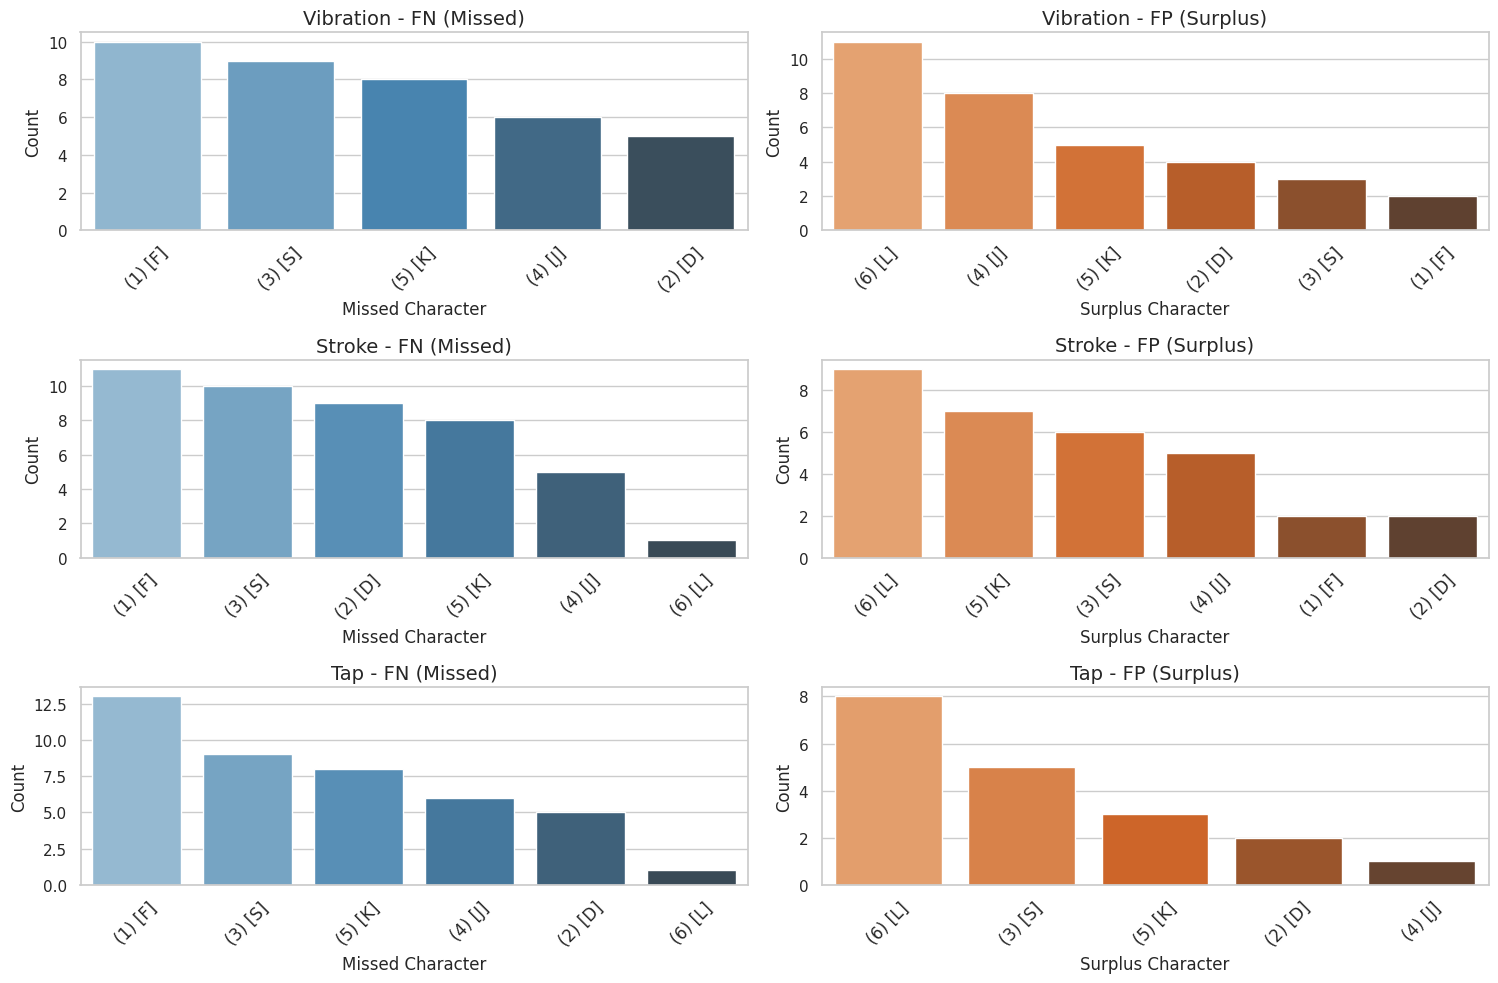

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def plot_character_counts(df):
    """
    Plot bar charts for 'Tested Character' and 'Surplus Character' counts per 'Condition'.

    Parameters:
        df (pd.DataFrame): DataFrame containing the 'Condition', 'Tested Character', 'Surplus Character' columns.
    """
    # Prepare the plotting environment
    conditions = df['Condition'].unique()
    num_conditions = len(conditions)

    # Set up the plotting environment (one row, multiple columns based on number of conditions)
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Set the font to a Unicode-compatible font
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # Loop over each condition and create a subplot
    for i, condition in enumerate(conditions):
        # Filter data for the current condition
        condition_data = df[df['Condition'] == condition]

        # First, apply explode to ensure you're working with individual characters
        condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
        condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: list(x) if isinstance(x, str) else x)

        # Now map the encoding dictionary to the exploded data
        condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: [numbers_encoding.get(c, c) for c in x])
        condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: [numbers_encoding.get(c, c) for c in x])

        # Then explode and calculate the value counts
        tested_char_counts = condition_data['Missed Character'].explode().value_counts()
        surplus_char_counts = condition_data['Surplus Character'].explode().value_counts()

        # Plot for Tested Character counts
        ax1 = plt.subplot(num_conditions, 2, i * 2 + 1)  # 2 columns, 1st column for Tested Characters
        sns.barplot(x=tested_char_counts.index, y=tested_char_counts.values, palette="Blues_d", ax=ax1)

        ax1.set_title(f"{condition} - FN (Missed)", fontsize=14)
        ax1.set_xlabel('Missed Character', fontsize=12)
        ax1.set_ylabel('Count', fontsize=12)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)

        # Plot for Surplus Character counts
        ax2 = plt.subplot(num_conditions, 2, i * 2 + 2)  # 2nd column for Surplus Characters
        sns.barplot(x=surplus_char_counts.index, y=surplus_char_counts.values, palette="Oranges_d", ax=ax2)

        ax2.set_title(f"{condition} - FP (Surplus)", fontsize=14)
        ax2.set_xlabel('Surplus Character', fontsize=12)
        ax2.set_ylabel('Count', fontsize=12)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)

        # Manually set the tick labels if needed to ensure Unicode rendering
        for tick in ax1.get_xticklabels() + ax2.get_xticklabels():
            tick.set_fontname("DejaVu Sans")

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig('/content/columnChart.pdf', format='pdf')



# Example usage:
# Assuming df contains the relevant data
plot_character_counts(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character', 'F1']])


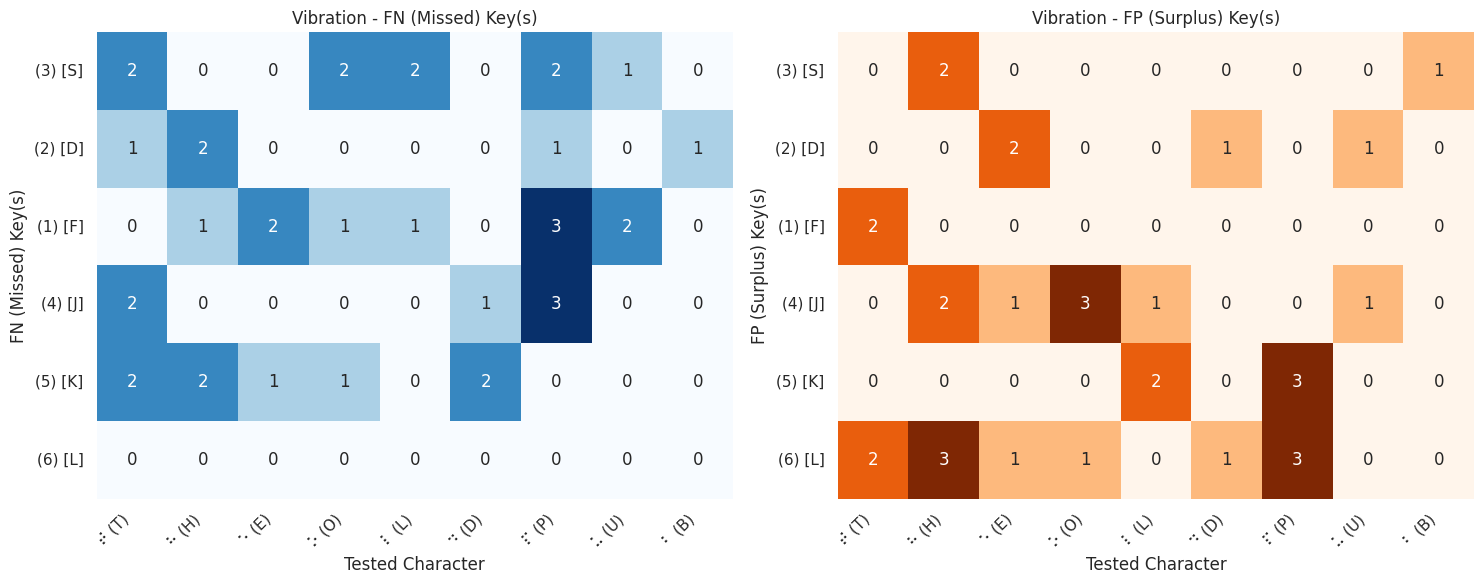

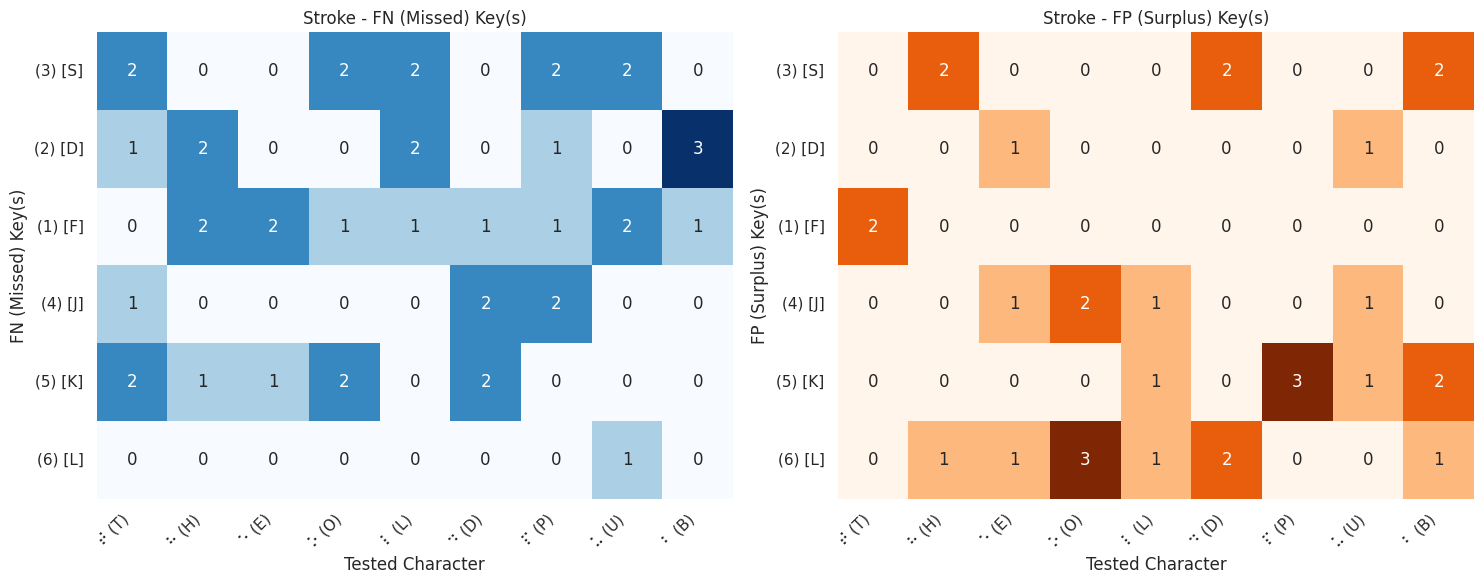

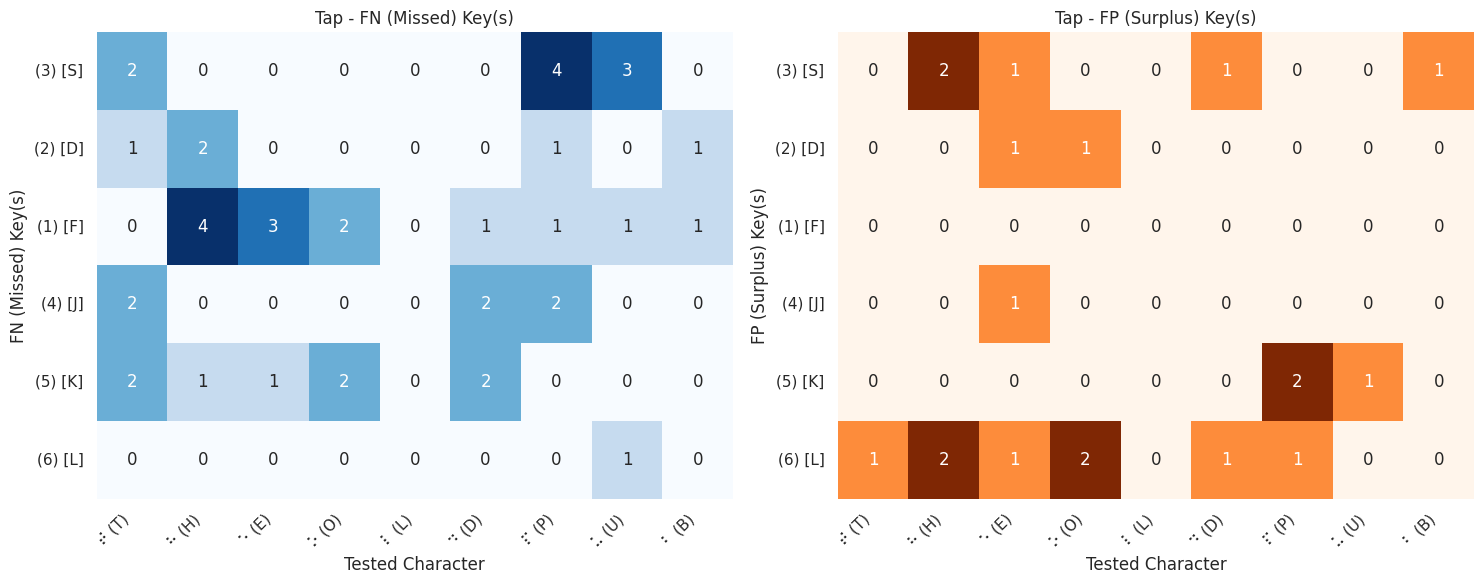

In [24]:
def plot_character_correlations_by_condition(df):
    """
    Plot correlation matrices for each condition, showing the relationship between the 'Tested Character'
    and the 'Missed Character' and 'Surplus Character'.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Tested Character',
                           'Missed Character', 'Surplus Character' columns.
    """
    # Define the characters that can appear in the 'Missed' and 'Surplus' sets
    missed_surplus_chars = ["s", "d", "f", "j", "k", "l"]
    tested_chars = ["t", "h", "e", "o", "l", "d", "p", "u", "b"]

    # Group the data by 'Condition'
    conditions = df['Condition'].unique()

    for condition in conditions:
        # Filter the dataframe for the current condition
        condition_df = df[df['Condition'] == condition]

        # Initialize dictionaries to hold the count data
        missed_char_matrix = {tested_char: {missed_char: 0 for missed_char in missed_surplus_chars} for tested_char in tested_chars}
        surplus_char_matrix = {tested_char: {surplus_char: 0 for surplus_char in missed_surplus_chars} for tested_char in tested_chars}

        # Loop through each row in the filtered dataframe to count the occurrences
        for _, row in condition_df.iterrows():
            tested_character = row['Tested Character']

            # Count occurrences of Missed Characters
            missed_chars = row['Missed Character']  # This is a set
            for missed_char in missed_chars:
                if missed_char in missed_surplus_chars:
                    missed_char_matrix[tested_character][missed_char] += 1

            # Count occurrences of Surplus Characters
            surplus_chars = row['Surplus Character']  # This is a set
            for surplus_char in surplus_chars:
                if surplus_char in missed_surplus_chars:
                    surplus_char_matrix[tested_character][surplus_char] += 1

        # Convert the count matrices to DataFrames for plotting
        missed_char_df = pd.DataFrame(missed_char_matrix)
        surplus_char_df = pd.DataFrame(surplus_char_matrix)

        # Map the characters to Braille or numbers
        missed_char_df = missed_char_df.rename(index=braille_character, columns=braille_character)
        surplus_char_df = surplus_char_df.rename(index=braille_character, columns=braille_character)

        # Modify y-axis to use the numbers encoding
        missed_char_df = missed_char_df.rename(index=numbers_encoding)
        surplus_char_df = surplus_char_df.rename(index=numbers_encoding)

        # Plot the correlation matrices for this condition
        plt.figure(figsize=(15, 6))

        # First subplot: Correlation between Tested and Missed Characters
        plt.subplot(1, 2, 1)
        sns.heatmap(missed_char_df, annot=True, cmap="Blues", fmt="d", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FN (Missed) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FN (Missed) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Second subplot: Correlation between Tested and Surplus Characters
        plt.subplot(1, 2, 2)
        sns.heatmap(surplus_char_df, annot=True, cmap="Oranges", fmt="d", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FP (Surplus) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FP (Surplus) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.savefig('/content/totalValues.pdf', format='pdf')

# Example usage:
# Assuming df contains the relevant data
plot_character_correlations_by_condition(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character']])


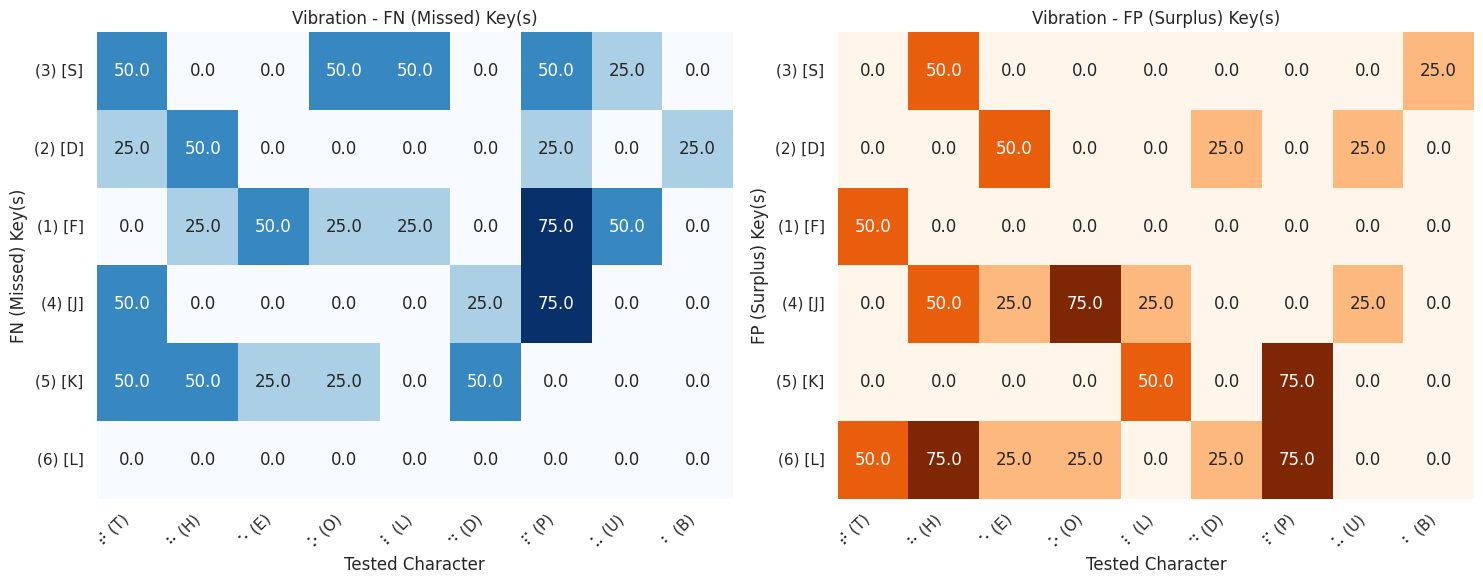

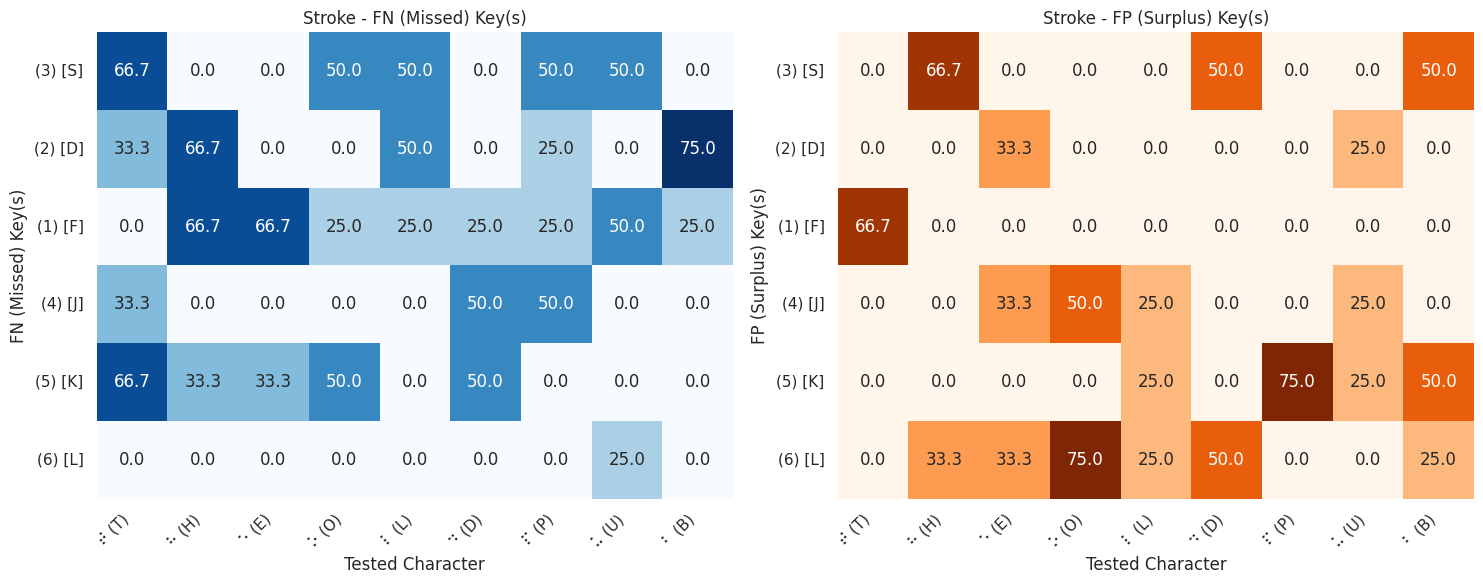

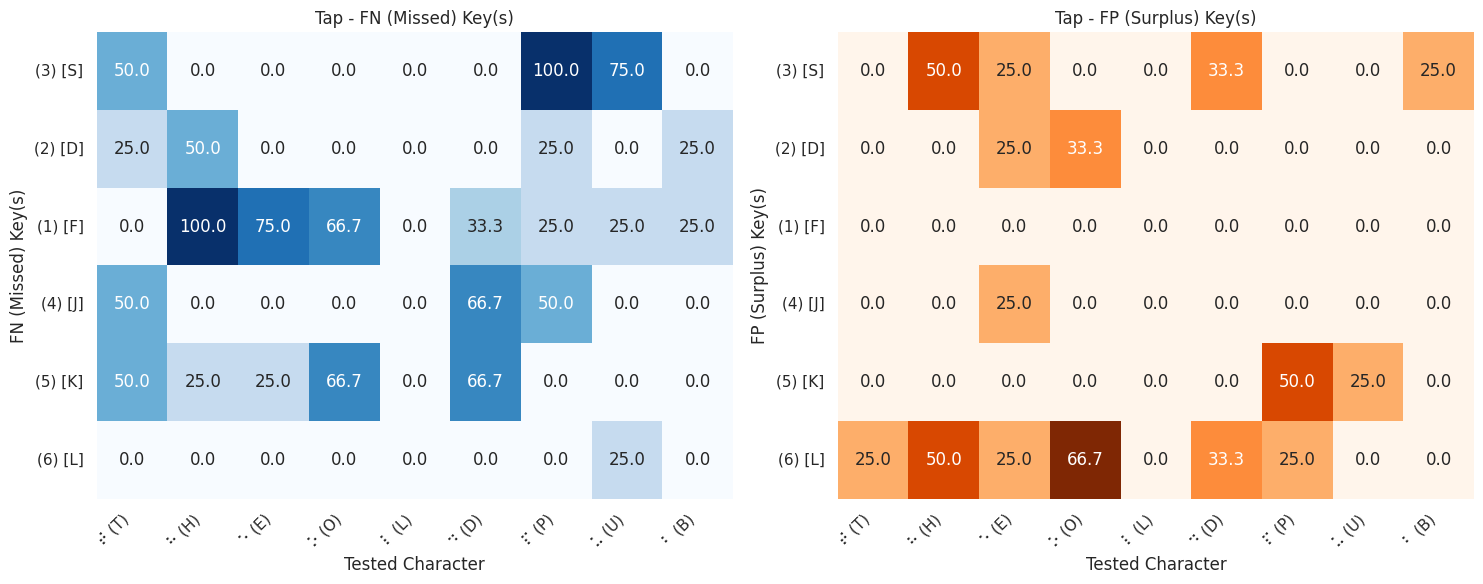

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_character_correlations_by_condition(df):
    """
    Plot correlation matrices for each condition, showing the relationship between the 'Tested Character'
    and the 'Missed Character' and 'Surplus Character' with percentage values.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Tested Character',
                           'Missed Character', 'Surplus Character' columns.
    """
    # Define the characters that can appear in the 'Missed' and 'Surplus' sets
    missed_surplus_chars = ["s", "d", "f", "j", "k", "l"]
    tested_chars = ["t", "h", "e", "o", "l", "d", "p", "u", "b"]

    # Group the data by 'Condition'
    conditions = df['Condition'].unique()

    for condition in conditions:
        # Filter the dataframe for the current condition
        condition_df = df[df['Condition'] == condition]

        # Initialize dictionaries to hold the count data
        missed_char_matrix = {tested_char: {missed_char: 0 for missed_char in missed_surplus_chars} for tested_char in tested_chars}
        surplus_char_matrix = {tested_char: {surplus_char: 0 for surplus_char in missed_surplus_chars} for tested_char in tested_chars}
        total_tested_char_matrix = {tested_char: 0 for tested_char in tested_chars}

        # Loop through each row in the filtered dataframe to count the occurrences
        for _, row in condition_df.iterrows():
            tested_character = row['Tested Character']

            # Count occurrences of Missed Characters
            missed_chars = row['Missed Character']  # This is a set
            for missed_char in missed_chars:
                if missed_char in missed_surplus_chars:
                    missed_char_matrix[tested_character][missed_char] += 1

            # Count occurrences of Surplus Characters
            surplus_chars = row['Surplus Character']  # This is a set
            for surplus_char in surplus_chars:
                if surplus_char in missed_surplus_chars:
                    surplus_char_matrix[tested_character][surplus_char] += 1

            # Track the total occurrences of each Tested Character (for percentage calculation)
            total_tested_char_matrix[tested_character] += 1

        # Convert the count matrices to DataFrames for plotting
        missed_char_df = pd.DataFrame(missed_char_matrix)
        surplus_char_df = pd.DataFrame(surplus_char_matrix)

        # Calculate percentage values for each matrix
        missed_char_percentage_df = missed_char_df.copy()
        surplus_char_percentage_df = surplus_char_df.copy()

        # Loop through each row and calculate the percentage based on the total occurrences of the Tested Character
        for tested_char in tested_chars:
            total_tested_char = total_tested_char_matrix[tested_char]

            # Avoid division by zero and calculate percentage
            if total_tested_char > 0:
                missed_char_percentage_df[tested_char] = (missed_char_df[tested_char] / total_tested_char) * 100
                surplus_char_percentage_df[tested_char] = (surplus_char_df[tested_char] / total_tested_char) * 100
            else:
                missed_char_percentage_df[tested_char] = 0  # Set to 0 if no Tested Character data
                surplus_char_percentage_df[tested_char] = 0  # Set to 0 if no Tested Character data

        # Map the characters to Braille or numbers
        missed_char_percentage_df = missed_char_percentage_df.rename(index=braille_character, columns=braille_character)
        surplus_char_percentage_df = surplus_char_percentage_df.rename(index=braille_character, columns=braille_character)

        # Modify y-axis to use the numbers encoding
        missed_char_percentage_df = missed_char_percentage_df.rename(index=numbers_encoding)
        surplus_char_percentage_df = surplus_char_percentage_df.rename(index=numbers_encoding)

        # Plot the correlation matrices for this condition
        plt.figure(figsize=(15, 6))

        # First subplot: Correlation between Tested and Missed Characters (Percentage)
        plt.subplot(1, 2, 1)
        sns.heatmap(missed_char_percentage_df, annot=True, cmap="Blues", fmt=".1f", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FN (Missed) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FN (Missed) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Second subplot: Correlation between Tested and Surplus Characters (Percentage)
        plt.subplot(1, 2, 2)
        sns.heatmap(surplus_char_percentage_df, annot=True, cmap="Oranges", fmt=".1f", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FP (Surplus) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FP (Surplus) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.savefig(f'/content/percentages_{condition}.pdf', format='pdf')


# Example usage:
# Assuming df contains the relevant data
plot_character_correlations_by_condition(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character']])


In [26]:
import pandas as pd

def one_hot_encode_submitted_value(df):
    """
    One-hot encode the 'Submitted Value' column in the dataframe.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Submitted Value', 'Ground Truth' columns.

    Returns:
        pd.DataFrame: DataFrame with one-hot encoded 'Submitted Value'.
    """
    # Define the possible values for 'Submitted Value'
    possible_values = ["s", "d", "f", "j", "k", "l"]

    for value in possible_values:
        df[f"Submitted_Value_{value}"] = df['Submitted Value'].apply(lambda x: 1 if value in x else 0)

    return df

# Apply the one-hot encoding function
df_encoded = one_hot_encode_submitted_value(df)
df_encoded

,F1,precision,recall,TP,FP,Submitted Value,Ground Truth,Missed Character,Surplus Character,Tested Character,Condition,Jaccard Score,Submitted_Value_s,Submitted_Value_d,Submitted_Value_f,Submitted_Value_j,Submitted_Value_k,Submitted_Value_l
0,0.750000,0.750000,0.750000,3,1,"{s, k, d, f}","{s, j, d, f}",{j},{k},p,Vibration,0.600000,1,1,1,0,1,0
1,0.857143,0.750000,1.000000,3,1,"{s, l, d, f}","{s, l, f}",{},{d},u,Vibration,0.750000,1,1,1,0,0,1
2,1.000000,1.000000,1.000000,2,0,"{d, f}","{d, f}",{},{},b,Vibration,1.000000,0,1,1,0,0,0
3,0.666667,0.666667,0.666667,2,1,"{k, j, f}","{s, k, f}",{s},{j},o,Vibration,0.500000,0,0,1,1,1,0
4,1.000000,1.000000,1.000000,3,0,"{s, d, f}","{s, d, f}",{},{},l,Vibration,1.000000,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0,2,"{s, l}","{k, d, f}","{k, d, f}","{s, l}",h,Tap,0.000000,1,0,0,0,0,1
98,0.500000,0.500000,0.500000,1,1,"{k, l}","{k, f}",{f},{l},e,Tap,0.333333,0,0,0,0,1,1
99,0.857143,1.000000,0.750000,3,0,"{j, d, f}","{s, j, d, f}",{s},{},p,Tap,0.750000,0,1,1,1,0,0
100,0.400000,0.500000,0.333333,1,1,"{k, l}","{s, l, f}","{s, f}",{k},u,Tap,0.250000,0,0,0,0,1,1


In [27]:
df_encoded[["Submitted Value", "Tested Character", "Condition","Submitted_Value_s",	"Submitted_Value_d","Submitted_Value_f","Submitted_Value_j","Submitted_Value_k","Submitted_Value_l"]]

,Submitted Value,Tested Character,Condition,Submitted_Value_s,Submitted_Value_d,Submitted_Value_f,Submitted_Value_j,Submitted_Value_k,Submitted_Value_l
0,"{s, k, d, f}",p,Vibration,1,1,1,0,1,0
1,"{s, l, d, f}",u,Vibration,1,1,1,0,0,1
2,"{d, f}",b,Vibration,0,1,1,0,0,0
3,"{k, j, f}",o,Vibration,0,0,1,1,1,0
4,"{s, d, f}",l,Vibration,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
97,"{s, l}",h,Tap,1,0,0,0,0,1
98,"{k, l}",e,Tap,0,0,0,0,1,1
99,"{j, d, f}",p,Tap,0,1,1,1,0,0
100,"{k, l}",u,Tap,0,0,0,0,1,1


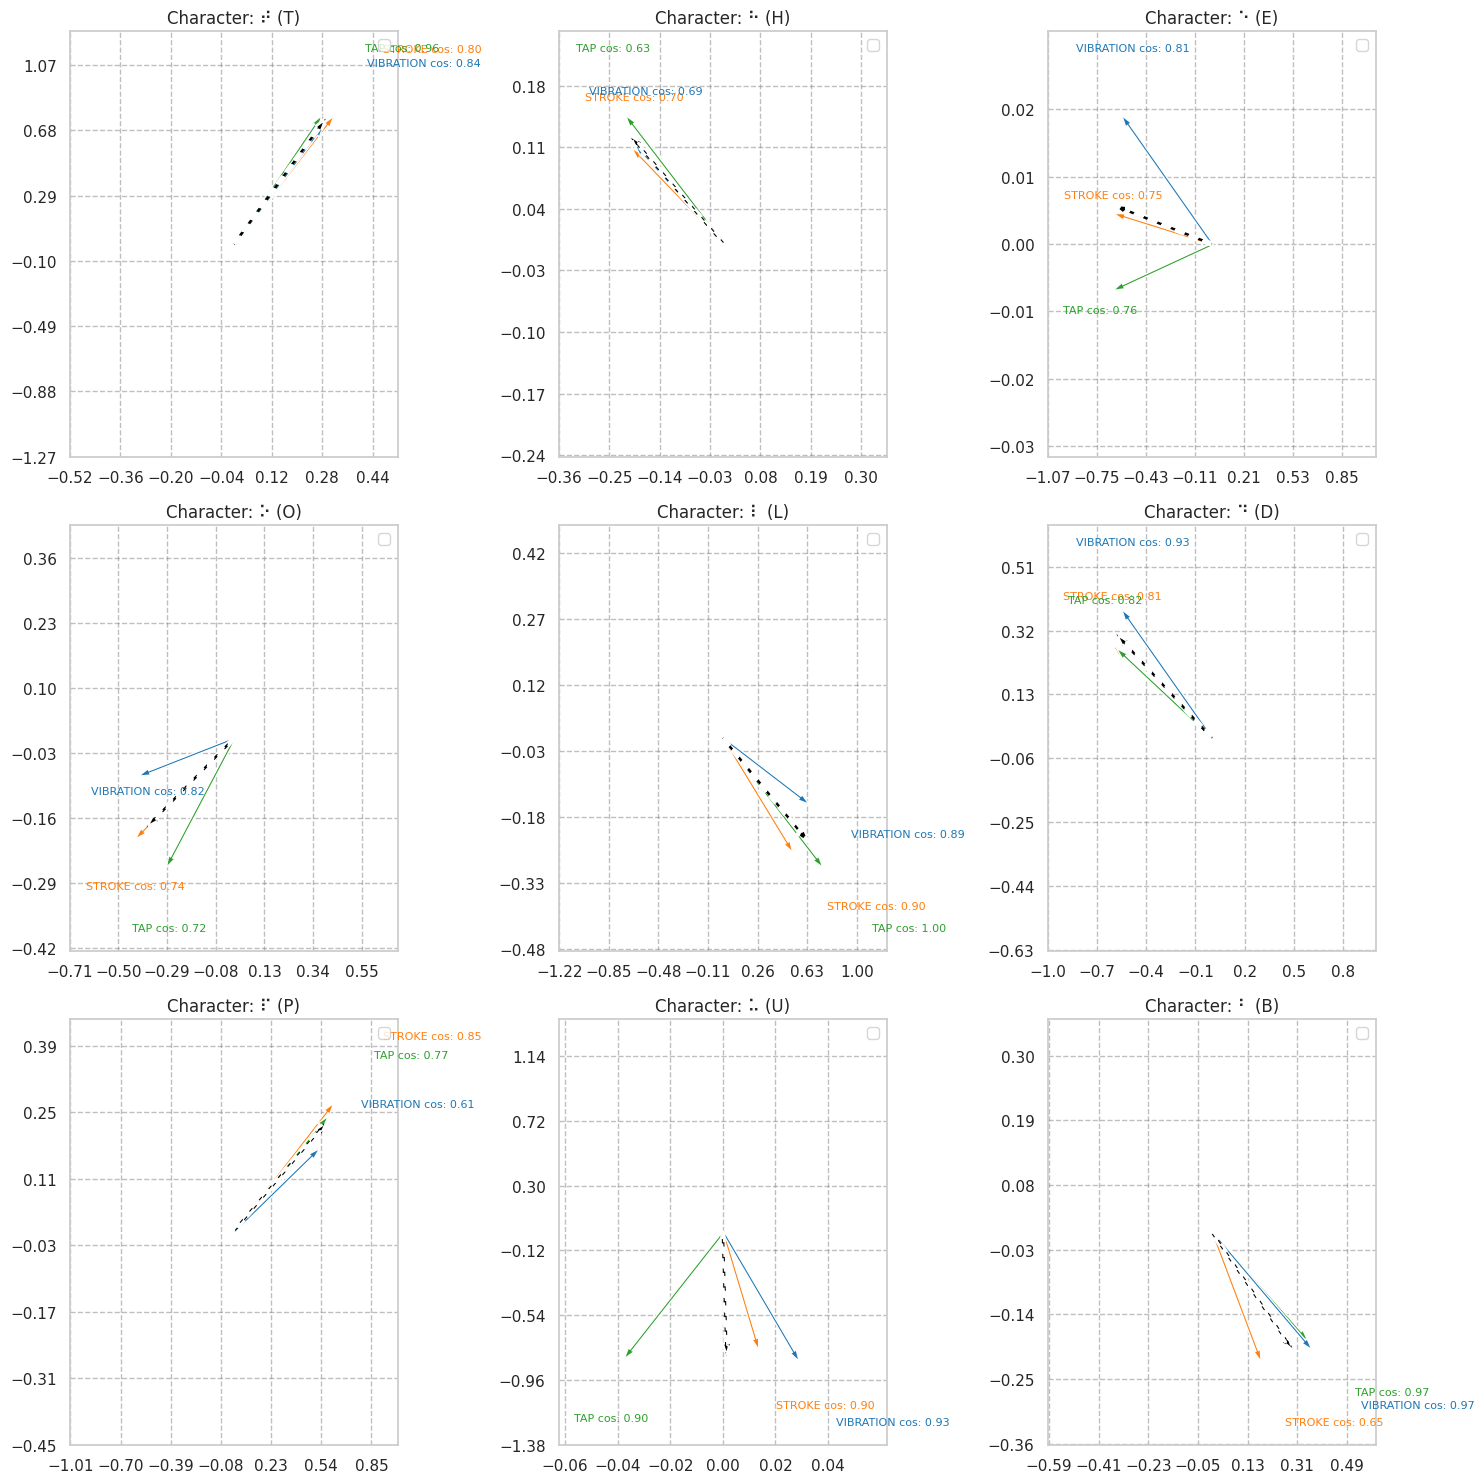

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

def one_hot_encode_submitted_value(df):
    """
    One-hot encode the 'Submitted Value' column in the dataframe.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Submitted Value', 'Ground Truth' columns.

    Returns:
        pd.DataFrame: DataFrame with one-hot encoded 'Submitted Value' and 'Ground Truth'.
    """
    # Define the possible values for 'Submitted Value' and 'Ground Truth'
    possible_values = ["s", "d", "f", "j", "k", "l"]

    # One-hot encode 'Submitted Value'
    for value in possible_values:
        df[f"Submitted_Value_{value}"] = df['Submitted Value'].apply(lambda x: 1 if value in x else 0)

    # One-hot encode 'Ground Truth'
    for value in possible_values:
        df[f"Ground_Truth_{value}"] = df['Ground Truth'].apply(lambda x: 1 if value in x else 0)

    return df

def plot_pca_for_grouped_data(df_encoded):
    """
    Plot PCA visualization for one-hot encoded 'Submitted Value' and 'Ground Truth' vectors, with labels for each condition,
    and create plots for each 'Tested Character' in a 3x3 grid. Vectors with the same 'Tested Character'
    and 'Condition' are merged and averaged.

    Parameters:
        df_encoded (pd.DataFrame): DataFrame containing 'Submitted Value', 'Ground Truth', 'Tested Character', 'Condition',
                                   and one-hot encoded columns for 'Submitted_Value_s', 'Submitted_Value_d',
                                   'Submitted_Value_f', 'Submitted_Value_j', 'Submitted_Value_k', 'Submitted_Value_l',
                                   'Ground_Truth_s', 'Ground_Truth_d', 'Ground_Truth_f', 'Ground_Truth_j', 'Ground_Truth_k', 'Ground_Truth_l'.
    """
    # Extract relevant columns for one-hot encoding
    one_hot_columns = ["Submitted_Value_s", "Submitted_Value_d", "Submitted_Value_f", "Submitted_Value_j", "Submitted_Value_k", "Submitted_Value_l"]
    ground_truth_columns = ["Ground_Truth_s", "Ground_Truth_d", "Ground_Truth_f", "Ground_Truth_j", "Ground_Truth_k", "Ground_Truth_l"]

    # One-hot encoding the vectors, grouping by 'Tested Character' and 'Condition'
    grouped = df_encoded.groupby(["Tested Character", "Condition"])[one_hot_columns + ground_truth_columns].mean().reset_index()

    # One-hot encoded vectors for PCA
    encodings_matrix = grouped[one_hot_columns + ground_truth_columns].values

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(encodings_matrix)

    # Create a color palette for the conditions (distinct colors)
    conditions = df_encoded['Condition'].unique()
    condition_colors = sns.color_palette("tab10", len(conditions))  # Using seaborn's color palette

    # Map each condition to a distinct color
    condition_color_map = {condition: condition_colors[i] for i, condition in enumerate(conditions)}

    # List of all tested characters
    tested_characters = ['t', 'h', 'e', 'o', 'l', 'd', 'p', 'u', 'b']

    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    # Iterate over each tested character and plot the PCA for each in its respective subplot
    for i, tested_char in enumerate(tested_characters):
        ax = axes[i]

        # Filter the grouped data for the current tested character
        filtered_group = grouped[grouped['Tested Character'] == tested_char]

        # Extract PCA data for the current tested character
        encodings_matrix = filtered_group[one_hot_columns + ground_truth_columns].values
        reduced_data = pca.transform(encodings_matrix)

        # Plot the vectors for each condition in the current tested character's plot
        for j, condition in enumerate(filtered_group['Condition']):
            avg_vector = reduced_data[j]
            color = condition_color_map[condition]

            ax.quiver(0, 0, avg_vector[0], avg_vector[1], angles='xy', scale_units='xy', scale=1.5,
                      color=color, linewidth=1)

            # Calculate the cosine similarity between 'Submitted Value' vector and 'Ground Truth' vector
            submitted_value_vector = filtered_group.iloc[j][one_hot_columns].values.reshape(1, -1)
            ground_truth_vector = filtered_group.iloc[j][ground_truth_columns].values.reshape(1, -1)
            cos_sim = cosine_similarity(submitted_value_vector, ground_truth_vector)[0][0]

            # Add cosine similarity to the label
            ax.text(avg_vector[0], avg_vector[1], f"{condition.upper()} cos: {cos_sim:.2f}", fontsize=8, color=color)

        # Plot the ground truth vector (same for all conditions in the character)
        ground_truth_vector = reduced_data.mean(axis=0)  # Average vector for ground truth (since it's the same for all conditions)
        ax.quiver(0, 0, ground_truth_vector[0], ground_truth_vector[1], angles='xy', scale_units='xy', scale=1.5,
                  color='black', linewidth=2, linestyle='--', pivot='tail')

        # Set axis limits for this plot
        max_x = np.max(np.abs(reduced_data[:, 0]))
        max_y = np.max(np.abs(reduced_data[:, 1]))
        ax.set_xlim(-max_x * 1.1, max_x * 1.1)
        ax.set_ylim(-max_y * 1.1, max_y * 1.1)

        # Set custom tick marks for better visibility
        ax.set_xticks(np.arange(round(-max_x * 1.1 *100)/100, round(max_x * 1.1 * 100)/100, round(max_x/3*100)/100.0))  # Custom tick marks for x-axis
        ax.set_yticks(np.arange(round(-max_y * 1.1 *100)/100.0, round(max_y * 1.1 * 100)/100.0, round(max_y/3*100)/100.0))  # Custom tick marks for y-axis
        ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

        ax.set_title(f"Character: {braille_character[tested_char]}")

        # Add a legend
        handles, labels_legend = ax.get_legend_handles_labels()
        ax.legend(handles, labels_legend, loc='upper right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.savefig('/content/vector.pdf', format='pdf')

# Example usage:
# Assuming df contains the relevant data with 'Submitted Value' and 'Ground Truth' columns
df_encoded = one_hot_encode_submitted_value(df)

# Call the function to plot PCA visualization
plot_pca_for_grouped_data(df_encoded)
